In [46]:
import requests
from bs4 import BeautifulSoup as bf

def ChangingURL(n):
    return 'https://www.drugs.com/comments/gabapentin/?sort=rating&order=desc&sort_reviews=highest_rating&page='+str(n)


def get_review(soup):
    ul=soup.find_all('div',{'class':'block-wrap comment-wrap'})
    #DrugReviews = [i.find_all('div')  for i in ul]
    result = []


    for DrugReview in ul:
        d={}
    
        try:
        
            Condition = DrugReview.find('div', {'class':'user-comment'}).b.get_text()
        
            #print Condition
            try:
                Review = DrugReview.find('div', {'class':'user-comment'}).span.get_text()
                Rating = DrugReview.find('div',{'class': "rating-score"}).get_text()
                #print Rating
            
            except:
                #Review = ""
                Rating = ""
               
            finally:
                d['Condition'] = Condition
                d['Review'] = Review
                d['Rating'] = Rating
                result.append(d)
                   
        except:
            pass
    
    return result


import pandas as pd

appended_data = []

for page in range(1,50):
    
    text =requests.get(ChangingURL(page)).text
   
    soup =bf(text)
    
    appended_data.append(pd.DataFrame(get_review(soup)))
appended_data = pd.concat(appended_data, axis=0).reset_index(drop=True)

In [47]:
Data = appended_data

In [61]:
Data['Condition'] = map(lambda x: x.replace('for ',''),Data['Condition'])

In [63]:
Data['Condition'] = Data.Condition.apply(lambda x: x.strip())

In [69]:
Data.to_csv('gabapentinData.csv', index=False,encoding="utf-8")

In [11]:
import pandas as pd
B = pd.read_csv('gabapentinData.csv')
set(B['Condition'])

{nan,
 'Alcohol Withdrawal',
 'Anxiety',
 'Benign Essential Tremor',
 'Bipolar Disorder',
 'Burning Mouth Syndrome',
 'Cough',
 'Diabetic Peripheral Neuropathy',
 'Epilepsy',
 'Fibromyalgia',
 'Hiccups',
 'Hot Flashes',
 'Insomnia',
 'Migraine',
 'Nausea/Vomiting, Chemotherapy Induced',
 'Neuropathic Pain',
 'Occipital Neuralgia',
 'Pain',
 'Periodic Limb Movement Disorder',
 'Peripheral Neuropathy',
 'Postherpetic Neuralgia',
 'Pruritus',
 'Pudendal Neuralgia',
 'Reflex Sympathetic Dystrophy Syndrome',
 'Restless Legs Syndrome',
 'Small Fiber Neuropathy',
 'Spondylolisthesis',
 'Transverse Myelitis',
 'Trigeminal Neuralgia',
 'Vulvodynia'}

In [97]:
B[B['Rating'].isnull()==False]

,Condition,Rating,Review
0,Reflex Sympathetic Dystrophy Syndrome,10.0,"""I was diagnosed with RSD on Tuesday. The doct..."
1,Restless Legs Syndrome,10.0,"""Good for sleeping and my RLS I take 300 at ..."
2,Bipolar Disorder,10.0,"""I have been using this medication for quite s..."
3,Postherpetic Neuralgia,10.0,"""I'm on 300mg 3x a day. It's my lifesaver for ..."
4,Anxiety,10.0,"""I have had periodic depression for years, and..."
5,Pain,10.0,"""Okay, I want to start off by clarifying that ..."
6,Peripheral Neuropathy,10.0,"""I was diagnosed with neuro sarcosis. I was in..."
7,Trigeminal Neuralgia,10.0,"""I have had TN since 1997, and remember only n..."
8,Hot Flashes,10.0,"""20 years ago I was experiencing 33 hot flushe..."
9,Peripheral Neuropathy,10.0,"""Last year I went off gabapentin as I wanted t..."


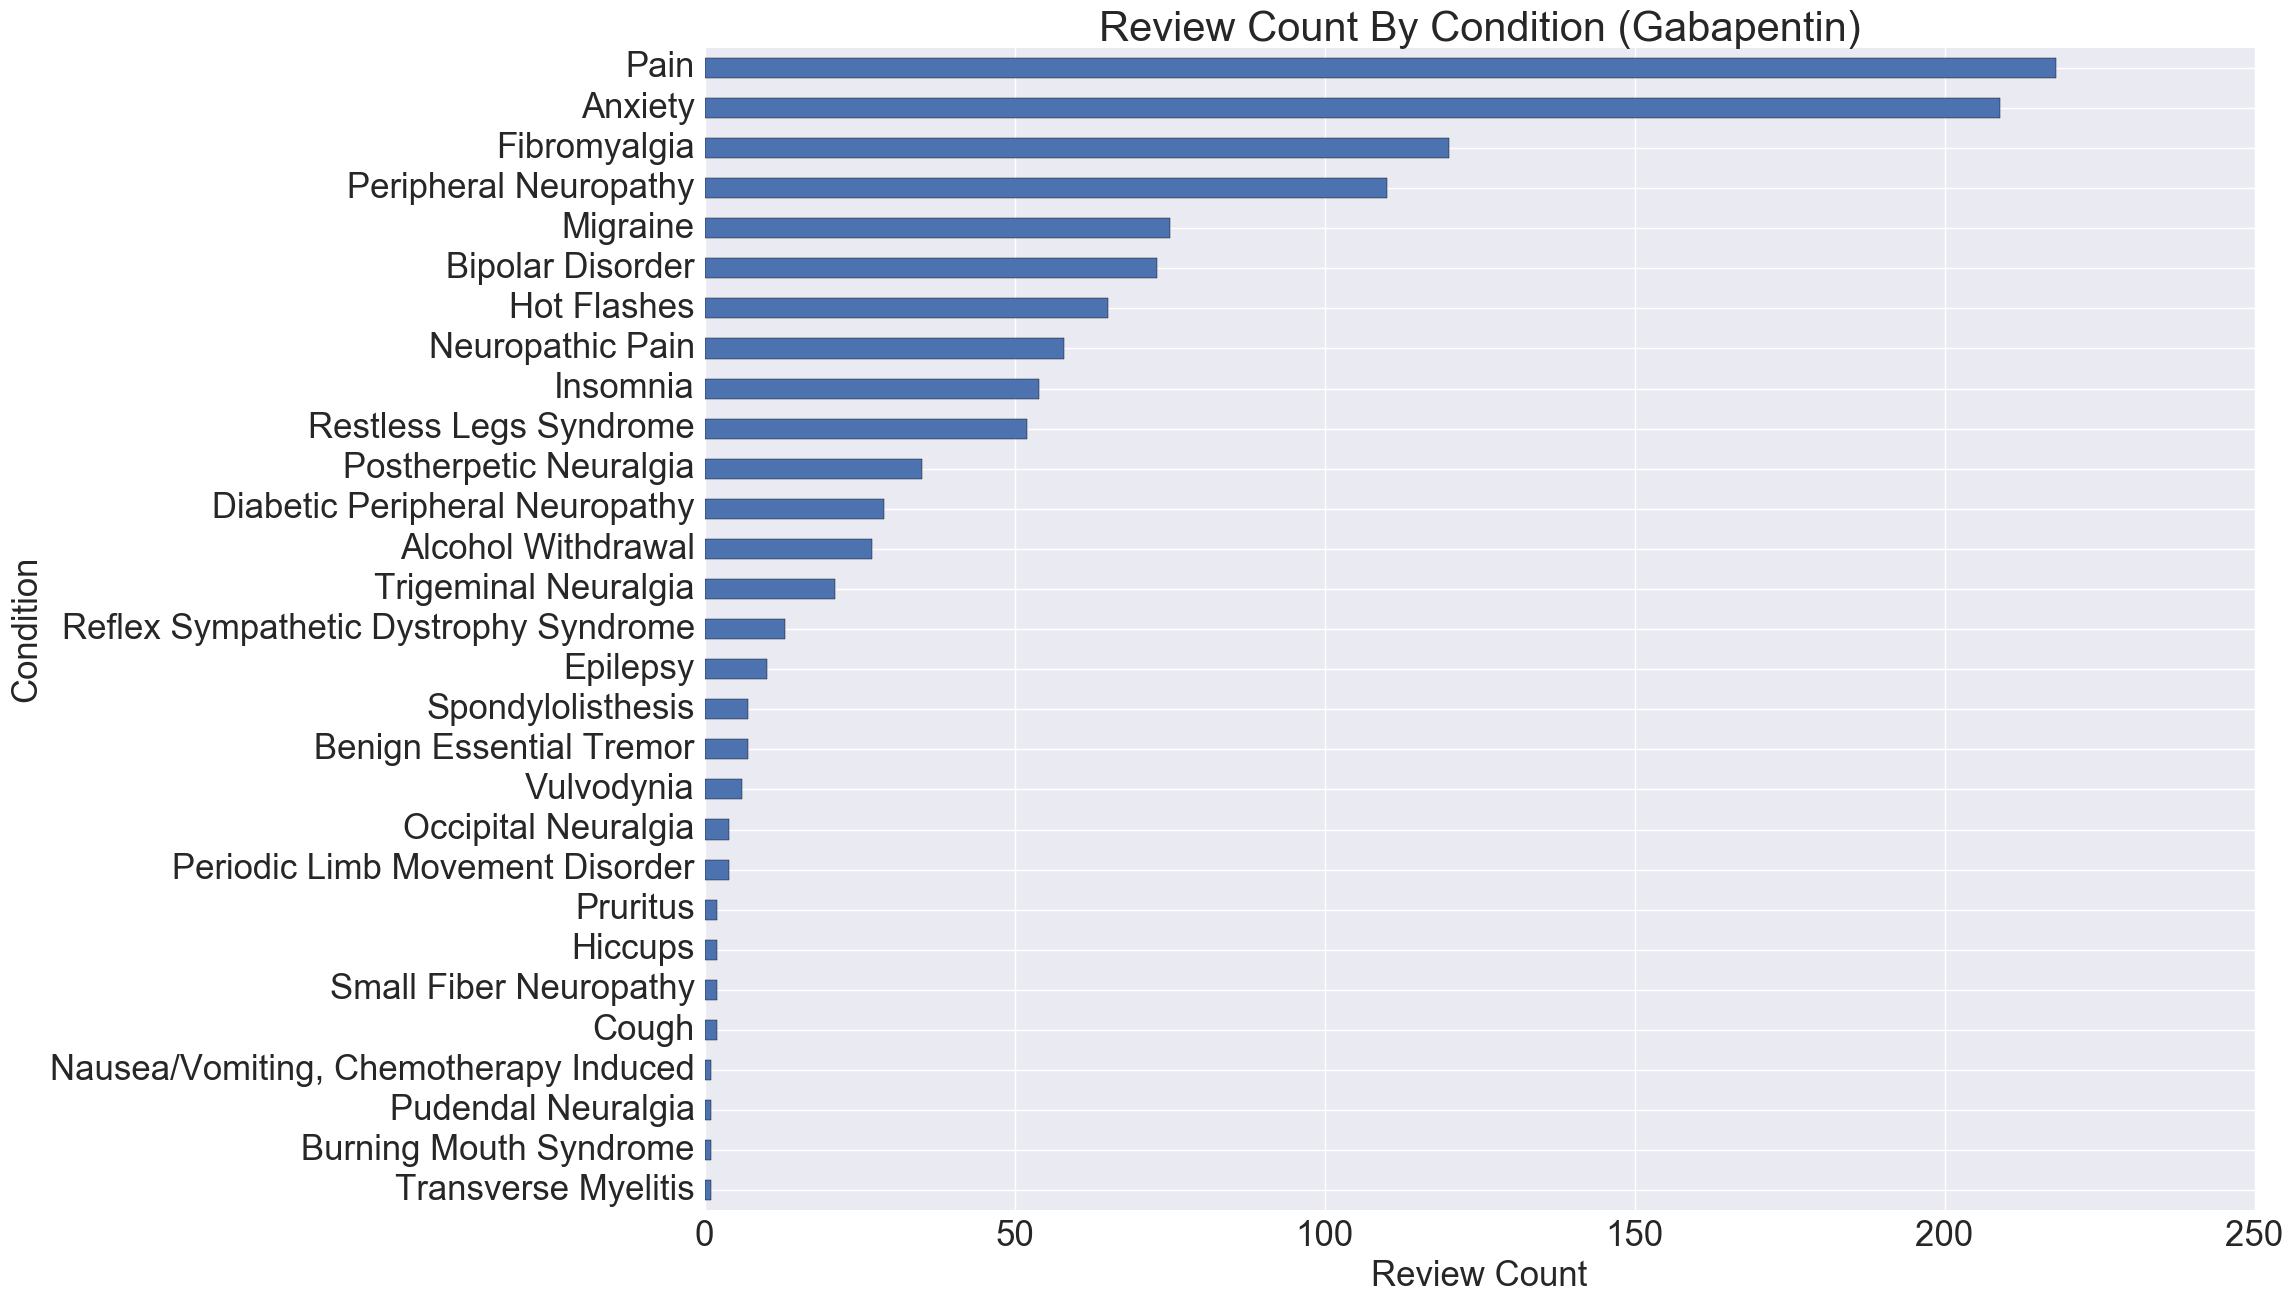

In [5]:
#Plot the count by condition for all reviews
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#matplotlib.style.use('ggplot')
B.groupby('Condition').size().sort_values(ascending=True).plot(kind='barh',fontsize=25,figsize=(20,15),sort_columns= True)
plt.xlabel('Review Count', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Review Count By Condition (Gabapentin)',fontsize= 30)

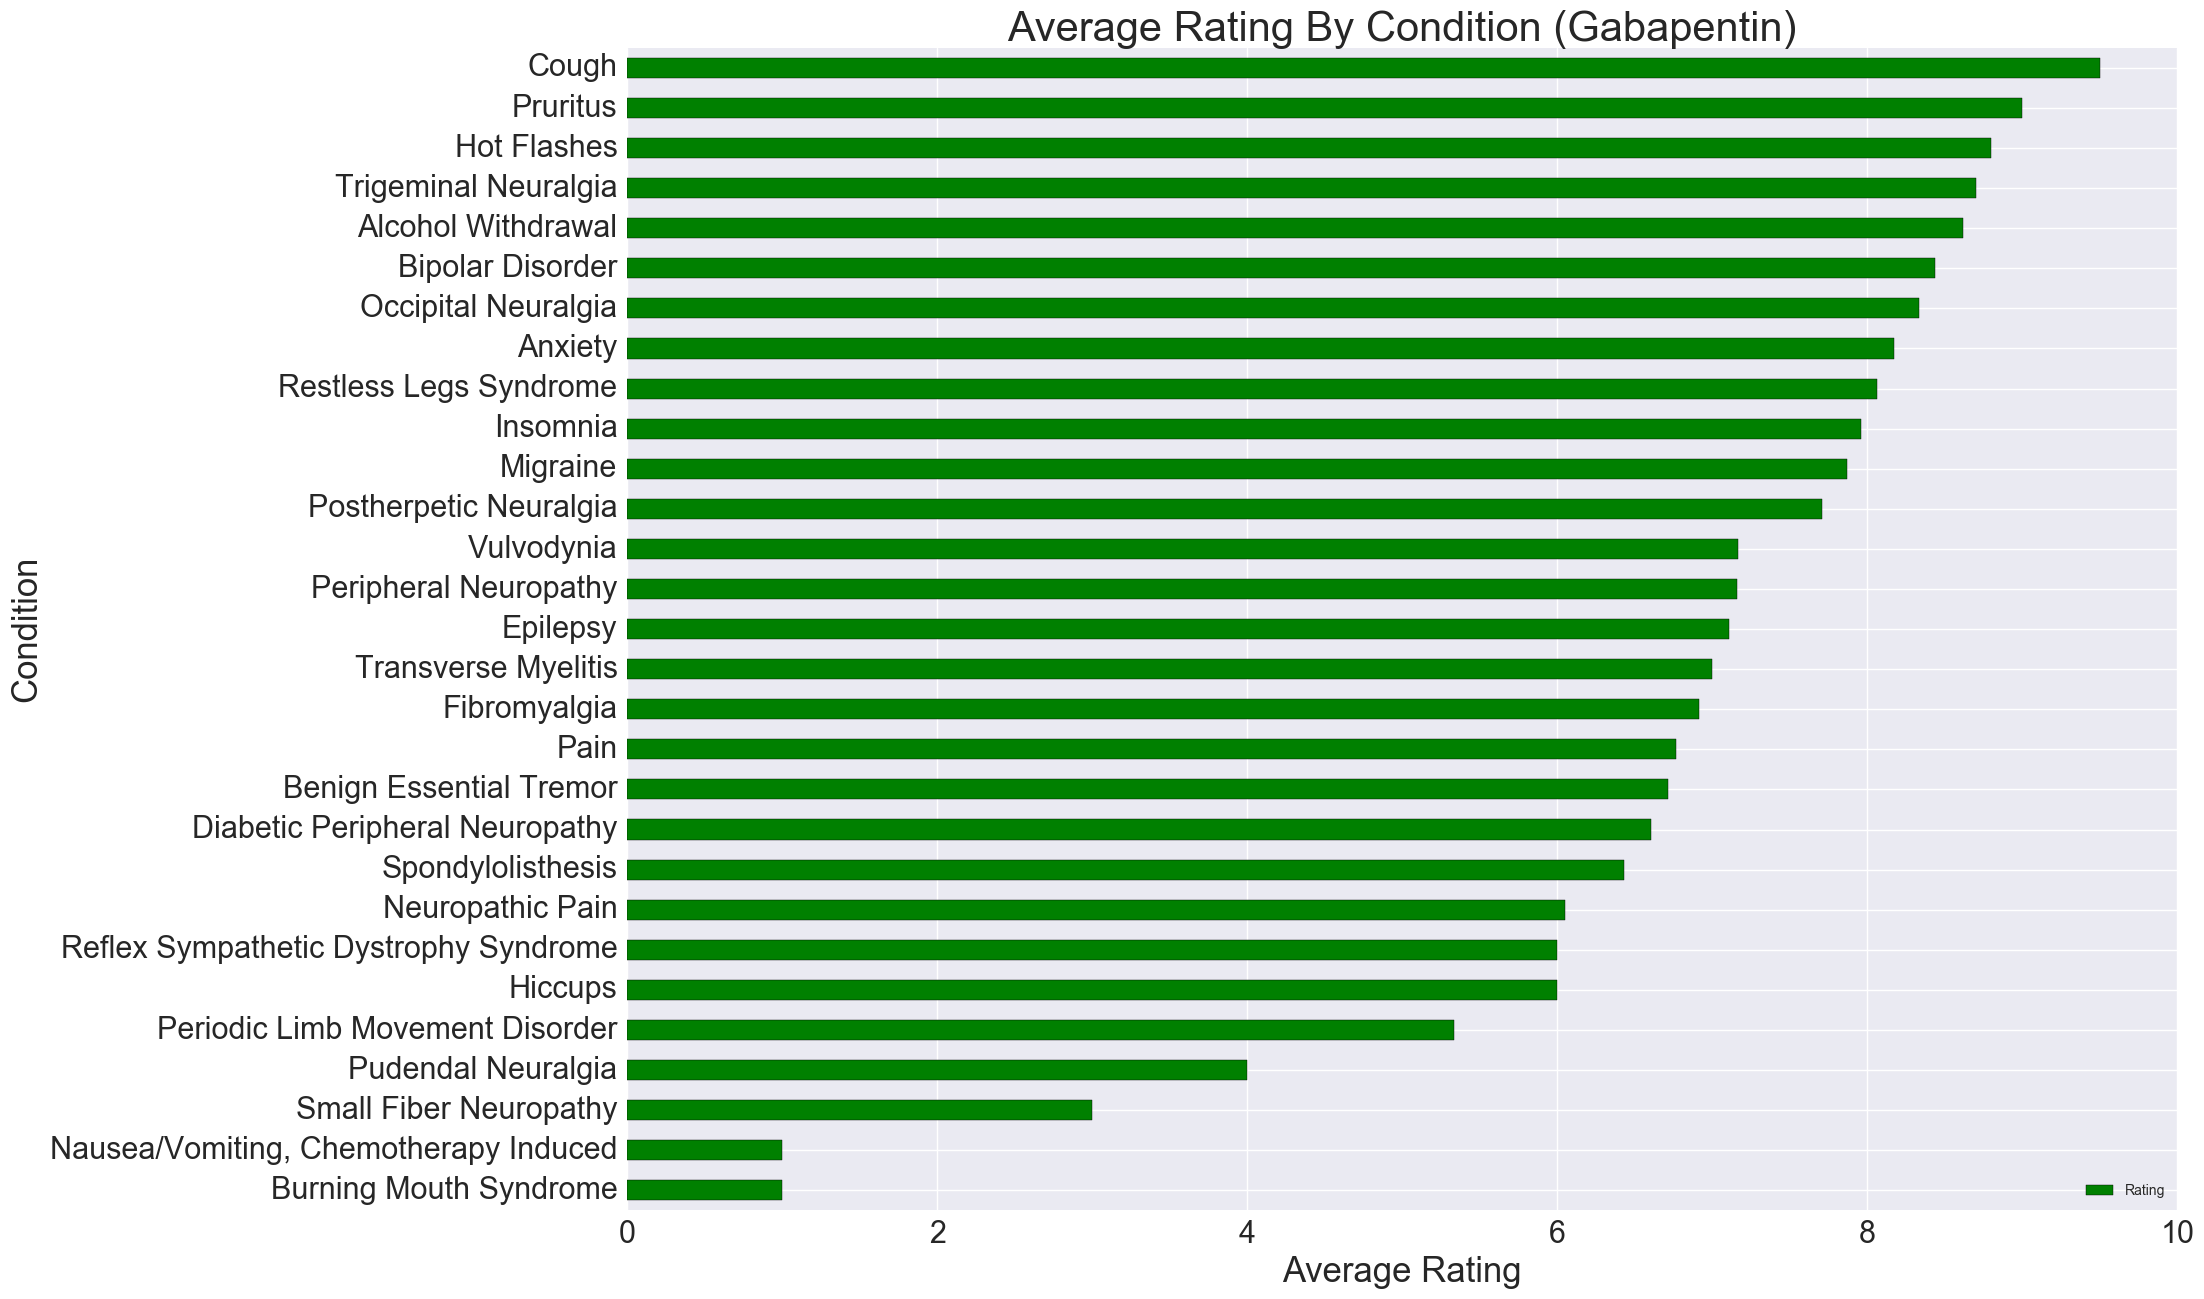

In [6]:
#Plot average rating by condition
DataWithRating = B[B['Rating'].isnull()==False]
DataWithRating.groupby('Condition').mean().sort_values("Rating", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.xlabel('Average Rating', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Average Rating By Condition (Gabapentin)',fontsize= 30)



In [12]:
clonazepam = pd.read_csv('clonazepamData.csv')



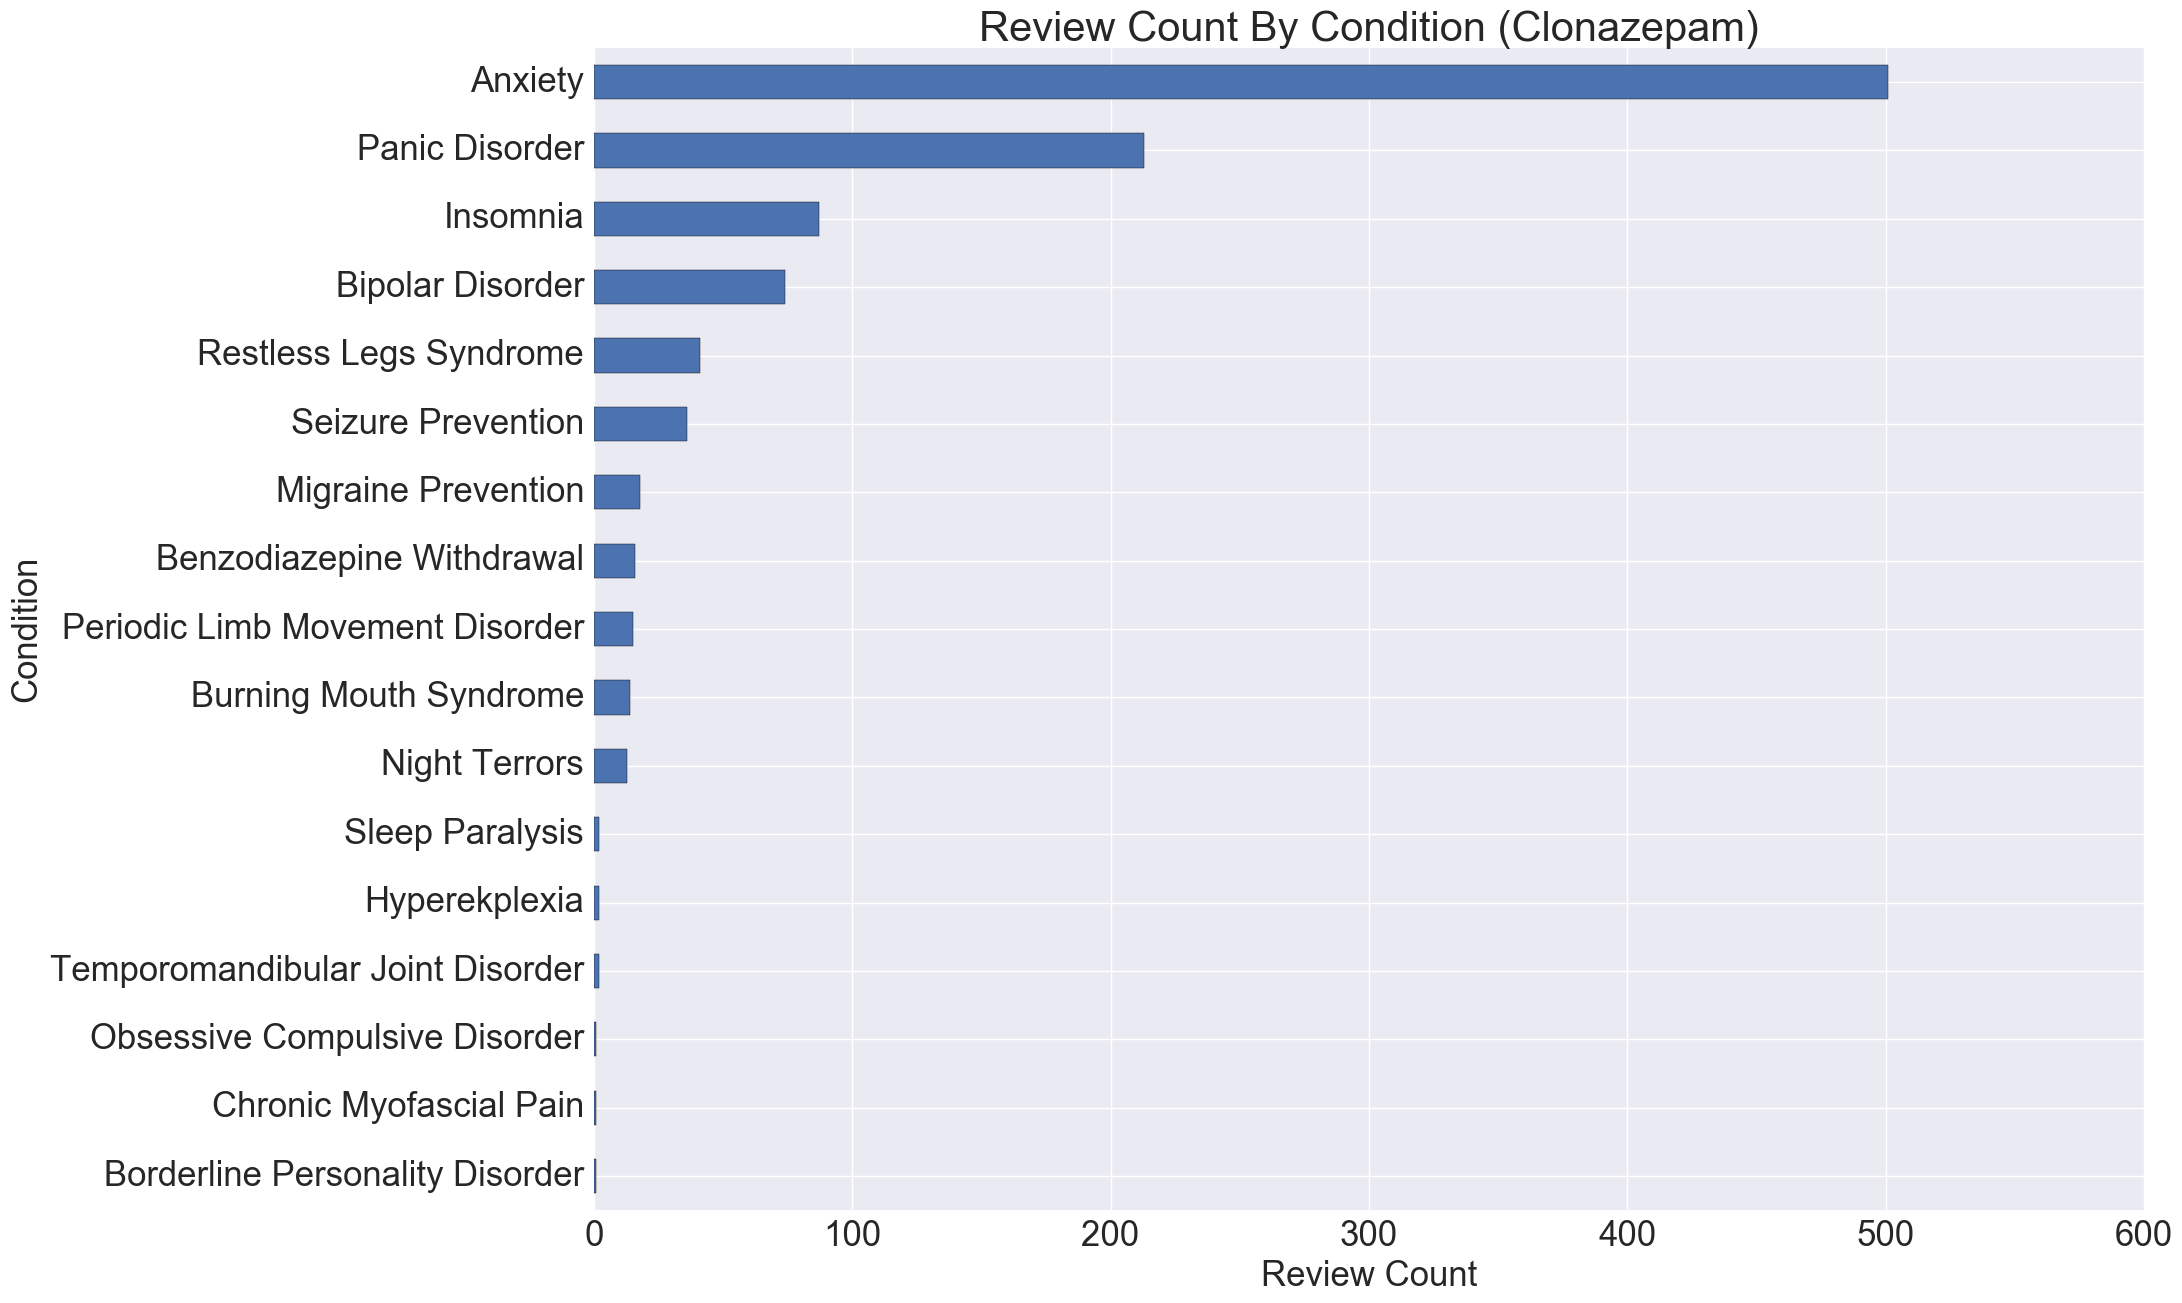

In [151]:
#Review Count By Condition for clonazepam
clonazepam.groupby('Condition').size().sort_values(ascending=True).plot(kind='barh',fontsize=25,figsize=(20,15),sort_columns= True)
plt.xlabel('Review Count', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Review Count By Condition (Clonazepam)',fontsize= 30)

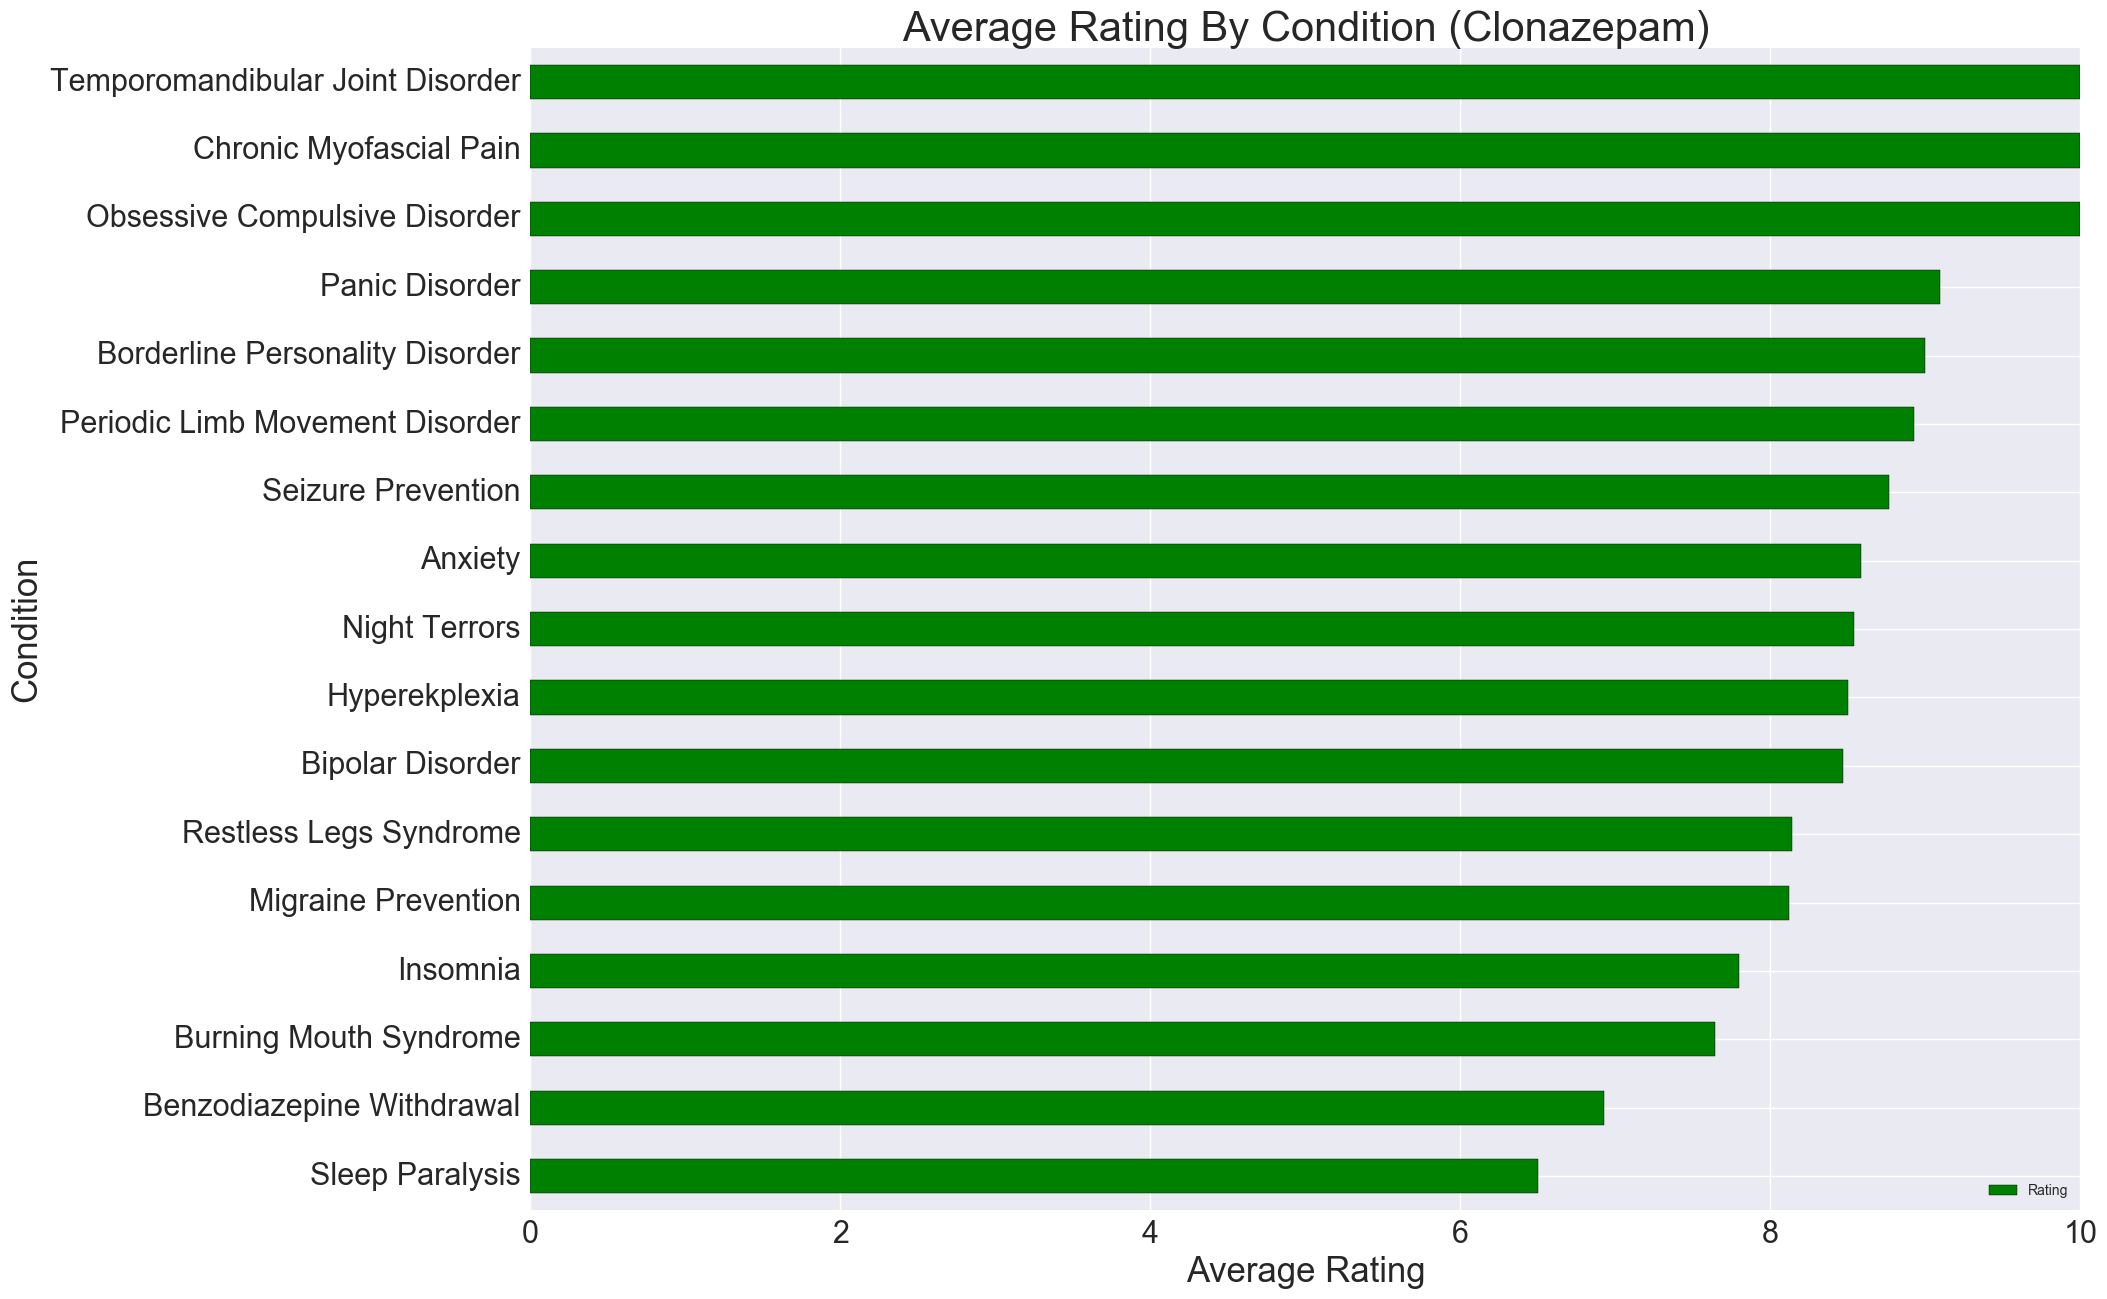

In [142]:
DataWithRating1 = clonazepam[clonazepam['Rating'].isnull()==False]
DataWithRating1.groupby('Condition').mean().sort_values("Rating", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.xlabel('Average Rating', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Average Rating By Condition (Clonazepam)',fontsize= 30)

In [13]:
Topiramate= pd.read_csv('TopiramateData.csv')


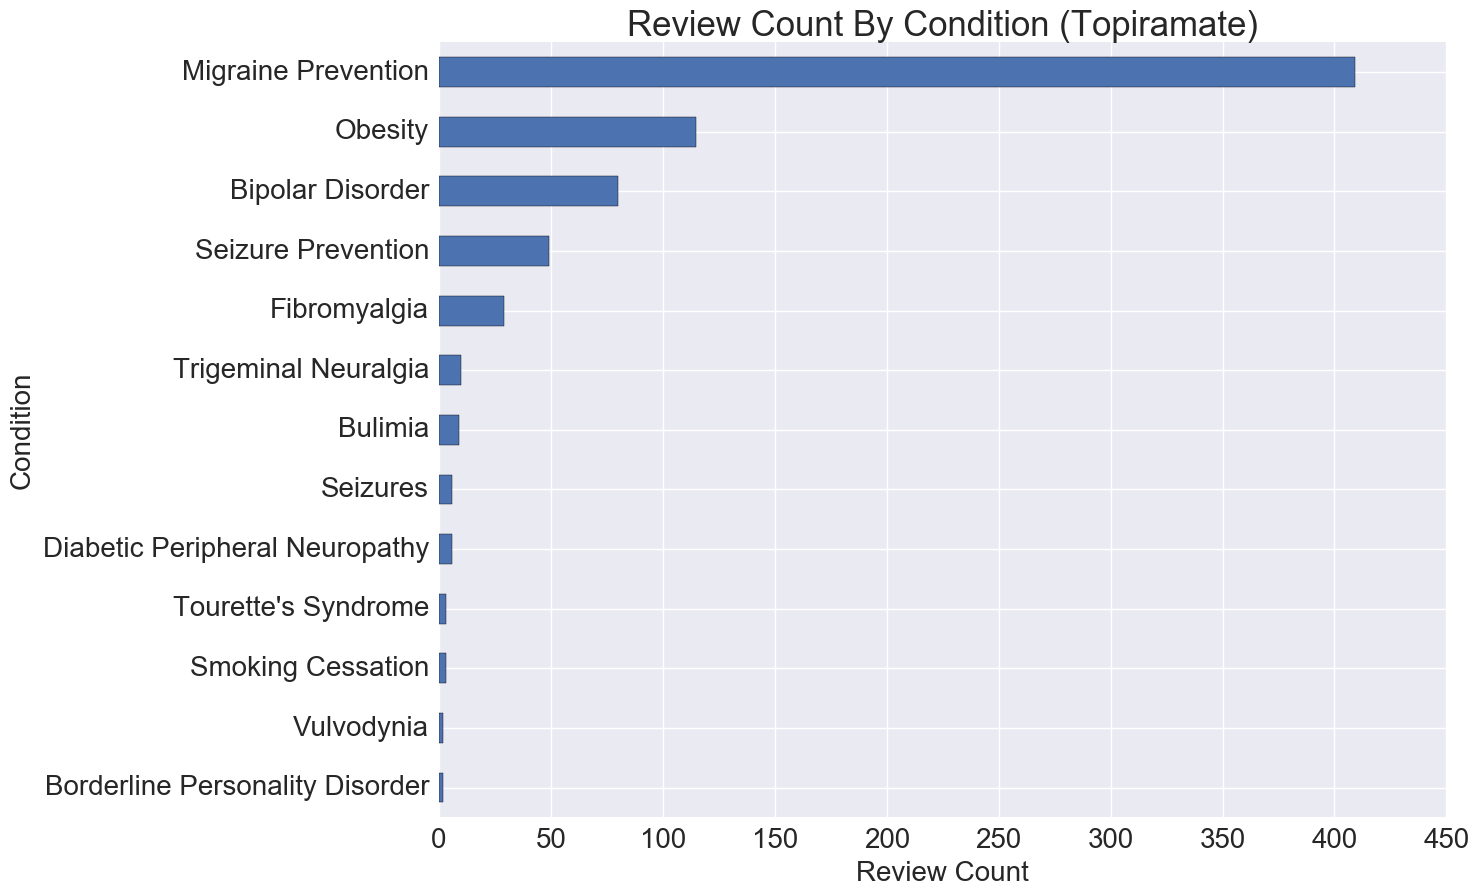

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
Topiramate.groupby('Condition').size().sort_values(ascending=True).plot(kind='barh',fontsize=20,figsize=(13,10),sort_columns= True)
plt.xlabel('Review Count', fontsize=20)
plt.ylabel('Condition', fontsize=20)
plt.title('Review Count By Condition (Topiramate)',fontsize= 25)

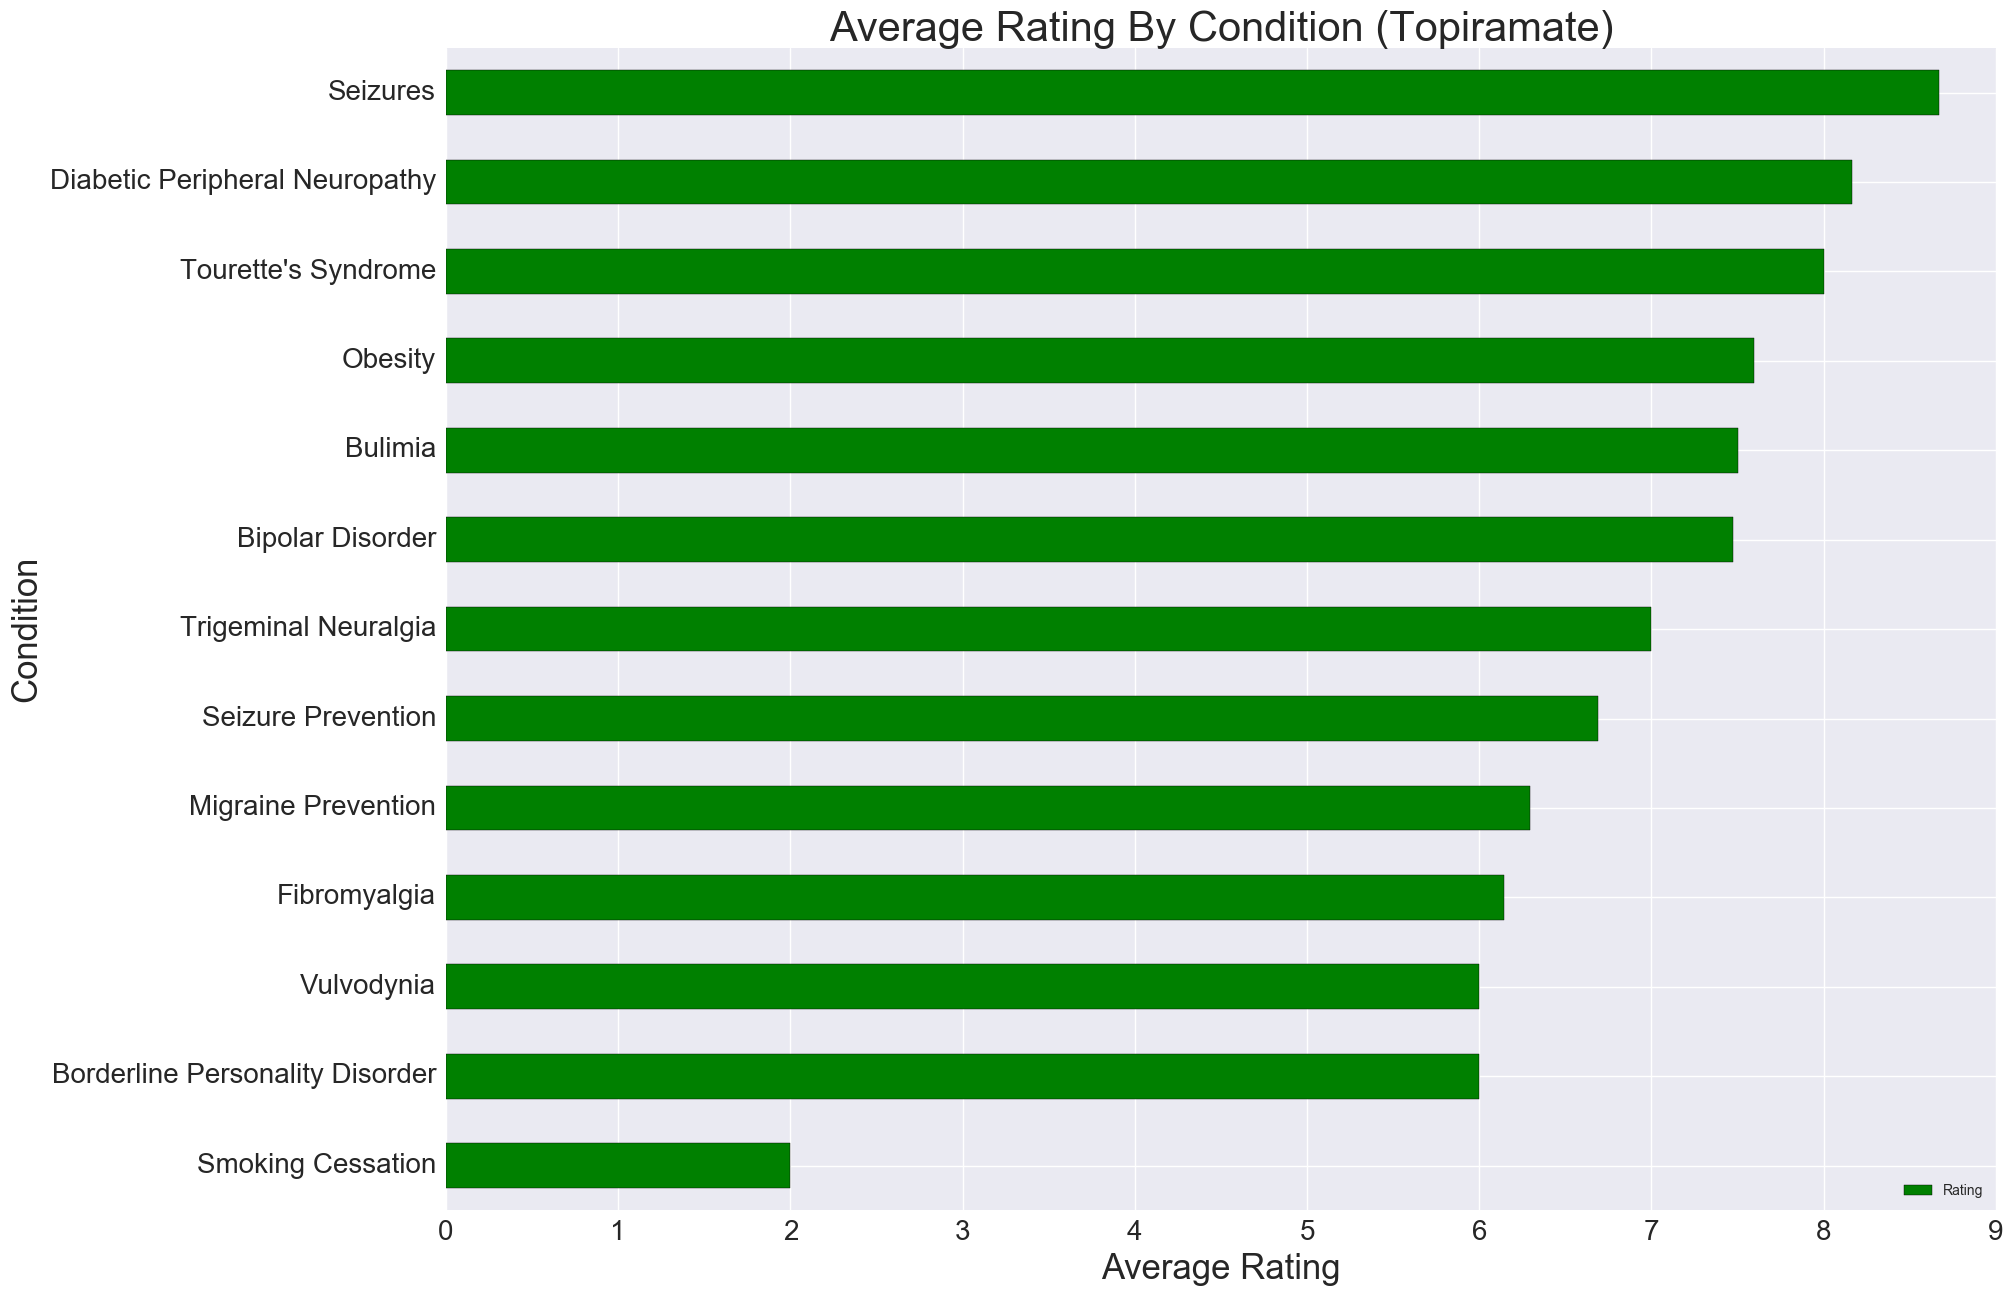

In [109]:
DataWithRating2 = Topiramate[Topiramate['Rating'].isnull()==False]
DataWithRating2.groupby('Condition').mean().sort_values("Rating", ascending=True).plot(fontsize=20,kind = 'barh',color = 'g',figsize=(20,15))
plt.xlabel('Average Rating', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Average Rating By Condition (Topiramate)',fontsize= 30)

In [14]:
import pandas as pd
Pregabalin = pd.read_csv('PregabalinData.csv')


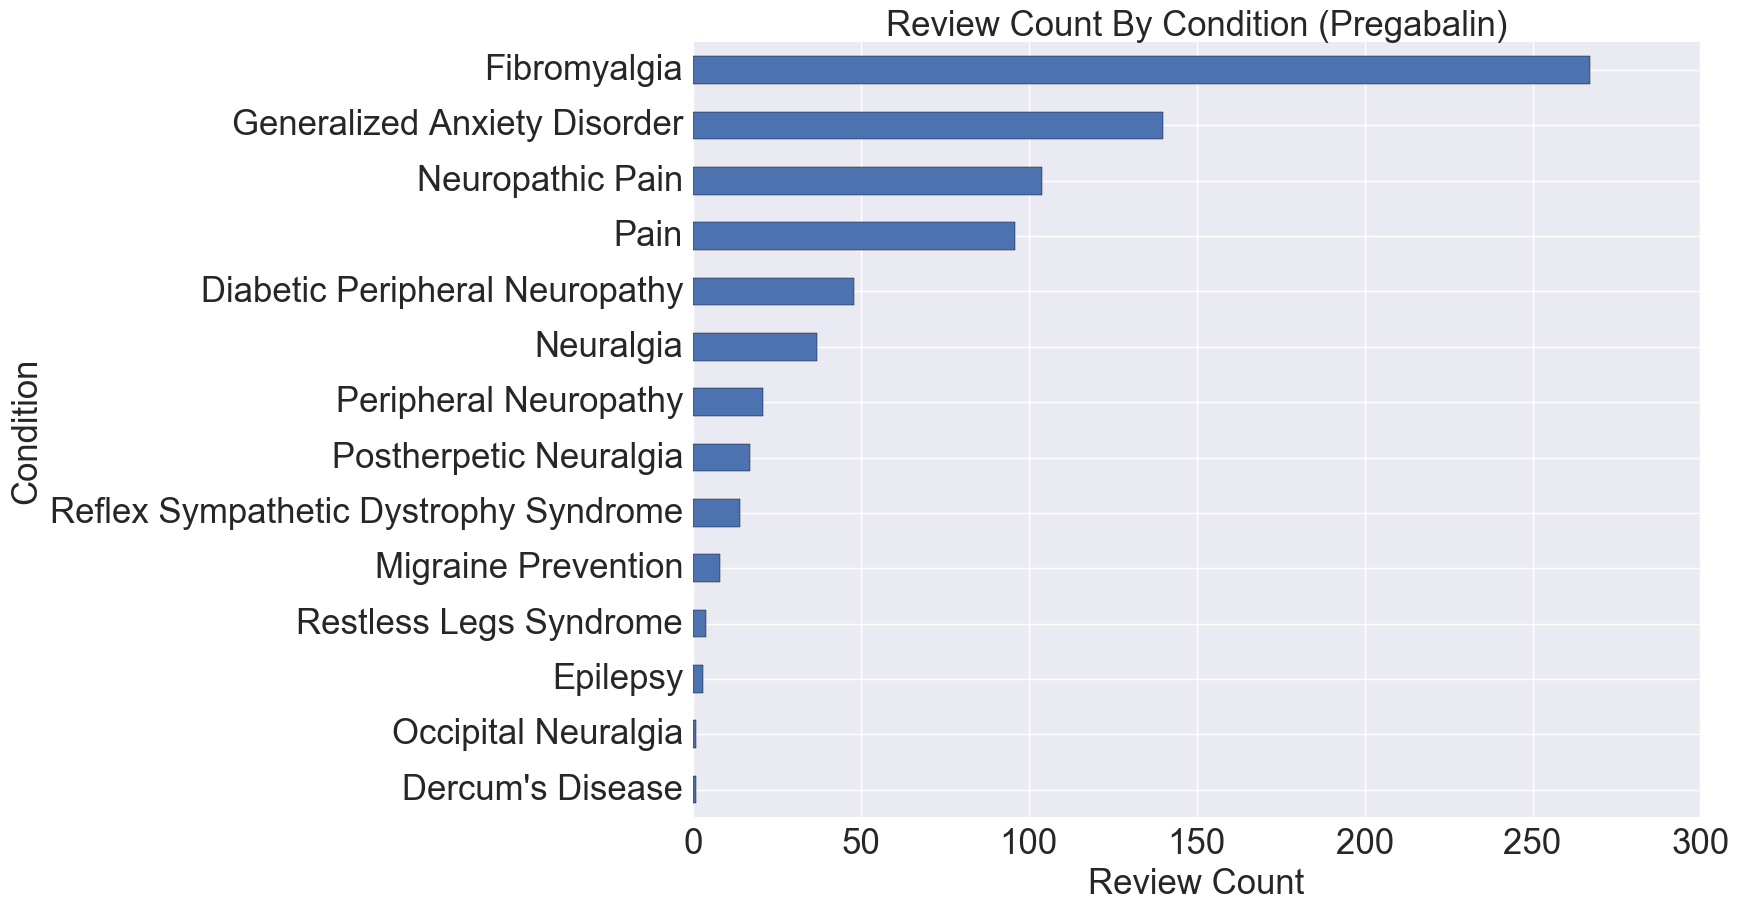

In [153]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
Pregabalin.groupby('Condition').size().sort_values(ascending=True).plot(kind='barh',fontsize=25,figsize=(13,10),sort_columns= True)
plt.xlabel('Review Count', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Review Count By Condition (Pregabalin)',fontsize= 25)

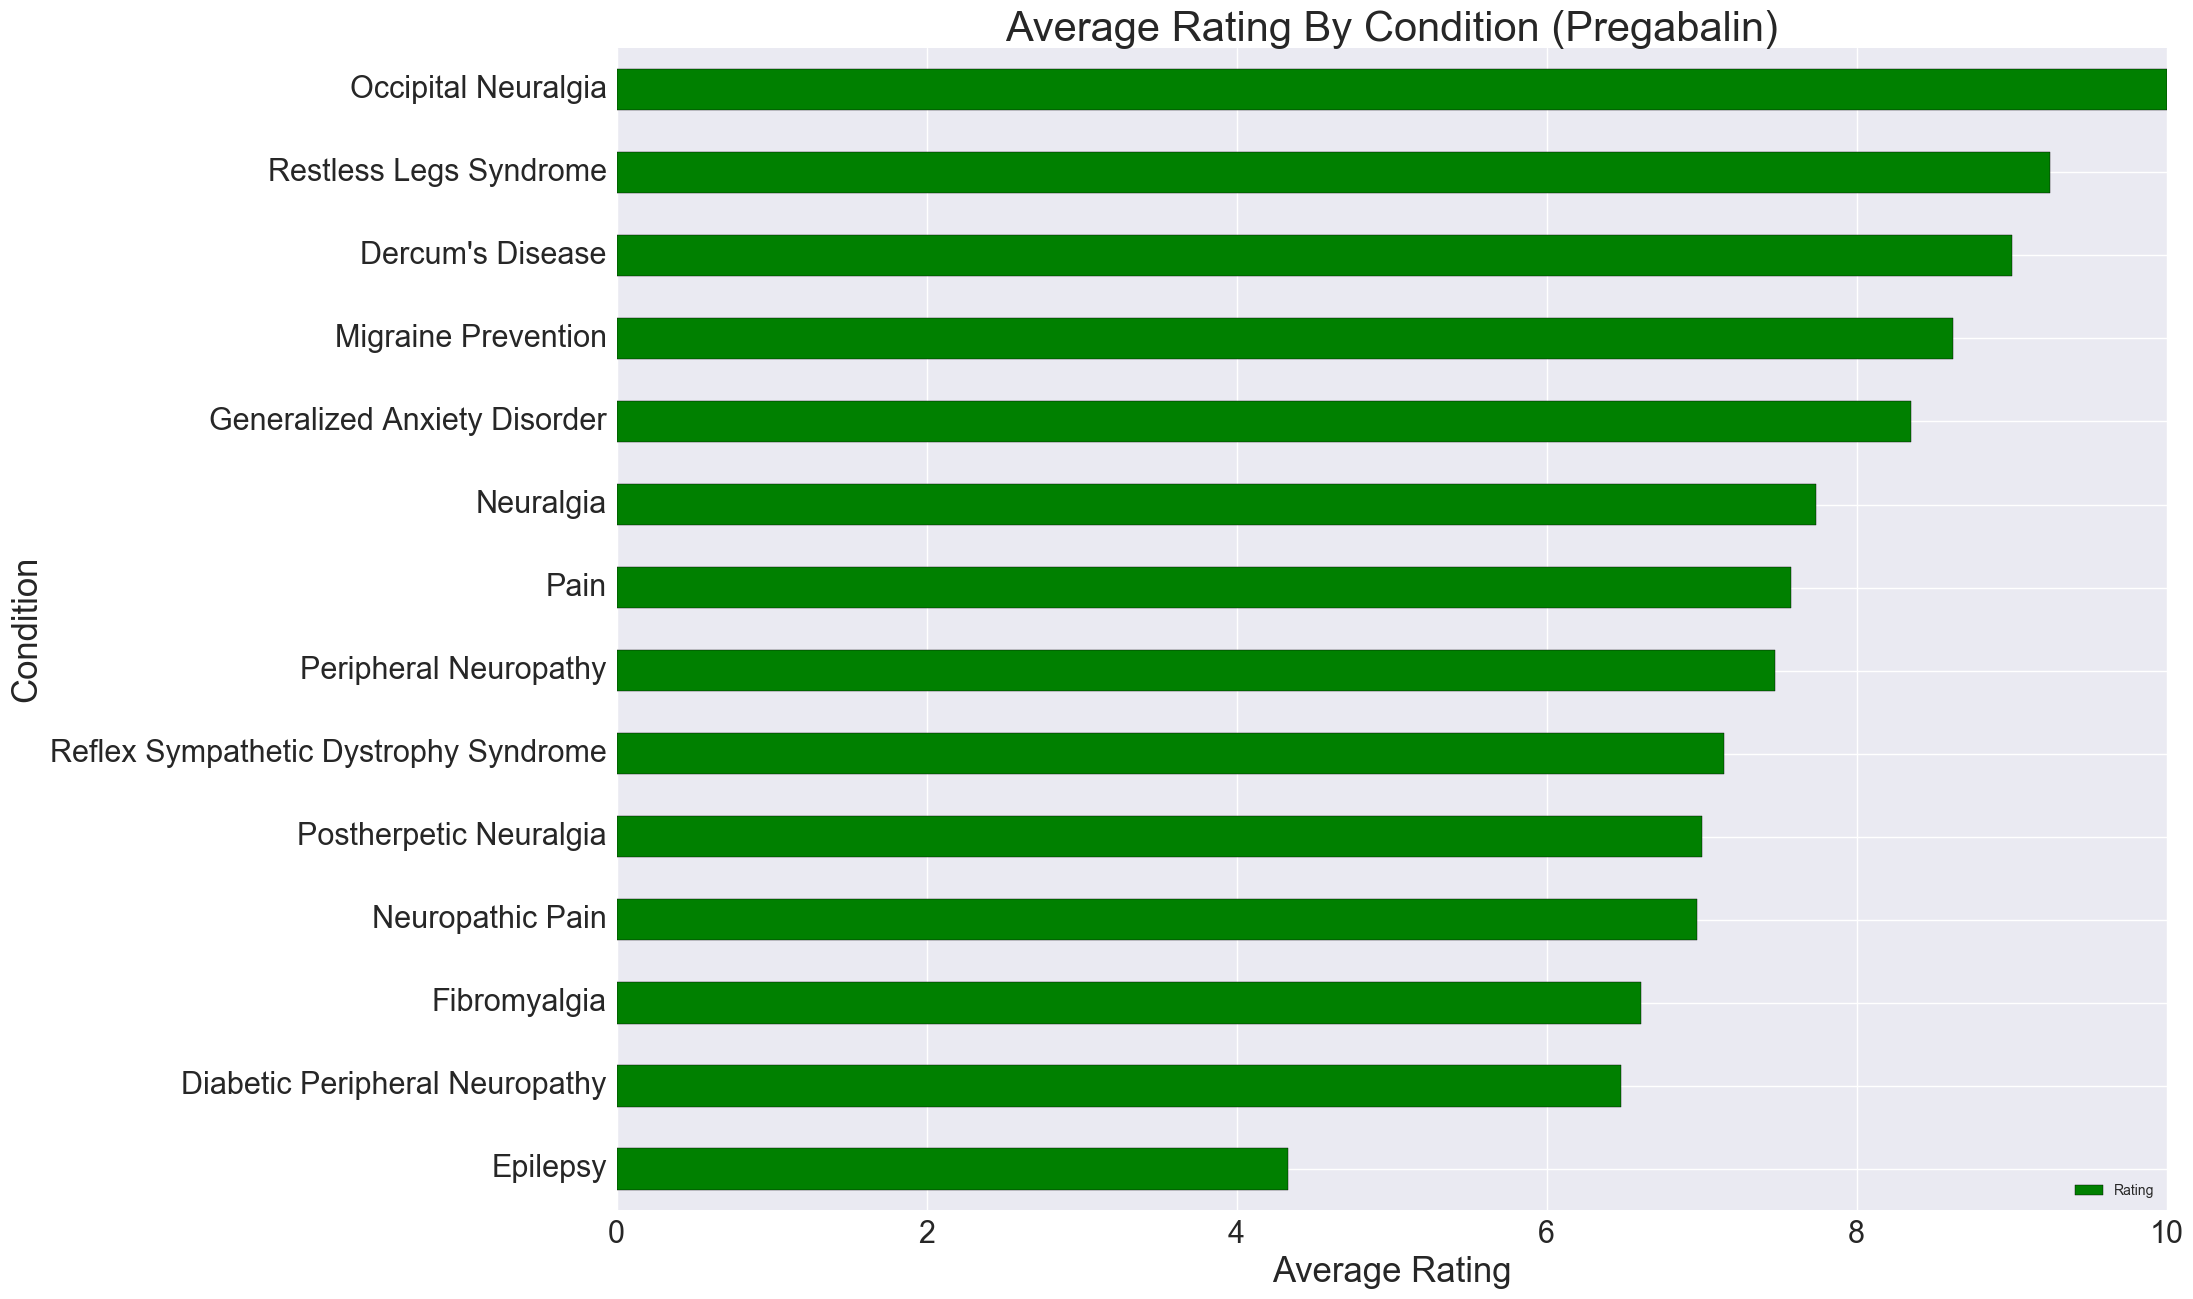

In [117]:
DataWithRating3 = Pregabalin[Pregabalin['Rating'].isnull()==False]
DataWithRating3.groupby('Condition').mean().sort_values("Rating", ascending=True).plot(fontsize=22,kind = 'barh',color = 'g',figsize=(20,15))
plt.xlabel('Average Rating', fontsize=25)
plt.ylabel('Condition', fontsize=25)
plt.title('Average Rating By Condition (Pregabalin)',fontsize= 30)

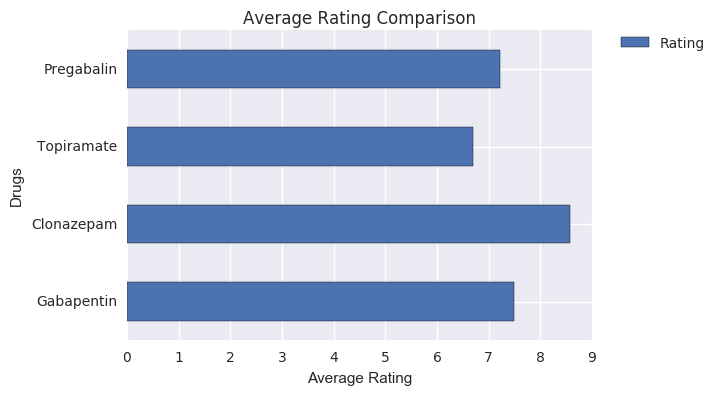

In [176]:
#Plot Average Rating for all drugs
AvgRating=[DataWithRating.mean(),DataWithRating1.mean(),DataWithRating2.mean(),DataWithRating3.mean()]
DrugAvgRating = pd.DataFrame(AvgRating, index=['Gabapentin','Clonazepam','Topiramate','Pregabalin'])

DrugAvgRating.plot.barh()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.title('Average Rating Comparison')
plt.xlabel('Average Rating')
plt.ylabel('Drugs')

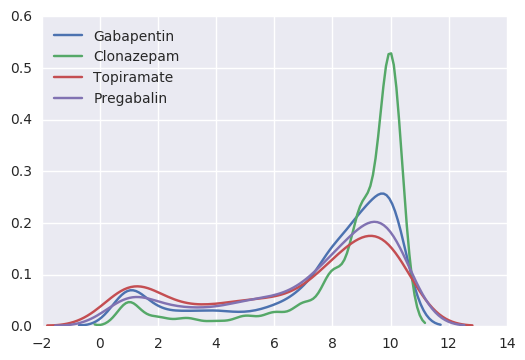

In [155]:
sns.kdeplot(DataWithRating['Rating'],label= 'Gabapentin')
sns.kdeplot(DataWithRating1['Rating'],label= 'Clonazepam')
sns.kdeplot(DataWithRating2['Rating'],label= 'Topiramate')
sns.kdeplot(DataWithRating3['Rating'],label= 'Pregabalin')

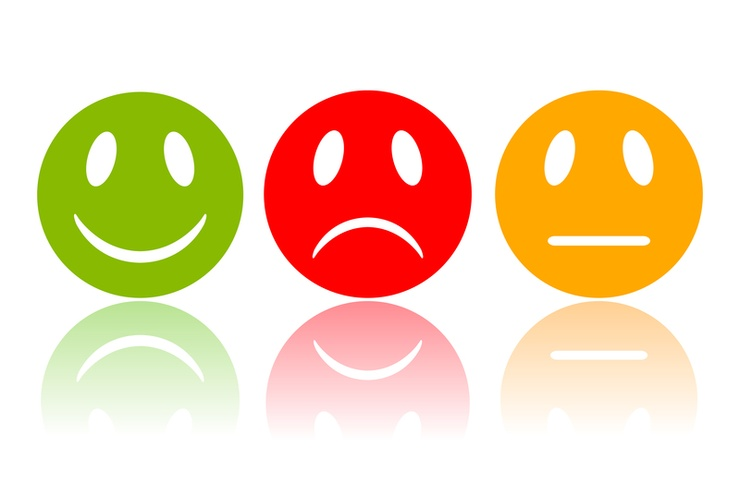

In [56]:
#http://planspace.org/20150607-textblob_sentiment/

from IPython.display import Image
Image(filename='Sentiment-Analysis.jpg')

In [209]:
# Sementic Analysis for Gabapentin
#http://planspace.org/20150607-textblob_sentiment/ 
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
from textblob import TextBlob
wiki = map(lambda x: TextBlob(x),B.Review)

#positive/negative 
result=[]
for i in range(len(wiki)):
    k = wiki[i].sentiment.polarity 
    result.append(k)
    
Positive = len([x for x in result if x>0])/float(len(result)) *100
Neutral = len([x for x in result if x==0])/float(len(result)) *100
Negative = len([x for x in result if x<0])/float(len(result)) *100

#objective/Subjective
result1=[]
for i in range(len(wiki)):
    objective  = wiki[i].sentiment.subjectivity 
    result1.append(objective)

objective = len([x for x in result1 if x<0.5])/float(len(result1)) *100


In [16]:
# Sementic Analysis for clonazepam
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
from textblob import TextBlob
wiki1 = map(lambda x: TextBlob(x),clonazepam.Review)

#positive/negative 
result2=[]
for i in range(len(wiki1)):
    k = wiki1[i].sentiment.polarity 
    result2.append(k)
    
Positive1 = len([x for x in result2 if x>0])/float(len(result2)) *100
Neutral1 = len([x for x in result2 if x==0])/float(len(result2)) *100
Negative1 = len([x for x in result2 if x<0])/float(len(result2)) *100

#objective/Subjective
result3=[]
for i in range(len(wiki1)):
    objective  = wiki1[i].sentiment.subjectivity 
    result3.append(objective)

objective1 = len([x for x in result3 if x<0.5])/float(len(result3)) *100

In [210]:
# Sementic Analysis for Topiramate
#http://planspace.org/20150607-textblob_sentiment/ 
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
from textblob import TextBlob
wiki2 = map(lambda x: TextBlob(x),Topiramate.Review)

#positive/negative 
result4=[]
for i in range(len(wiki2)):
    k = wiki2[i].sentiment.polarity 
    result4.append(k)
    
Positive2 = len([x for x in result4 if x>0])/float(len(result4)) *100
Neutra12 = len([x for x in result4 if x==0])/float(len(result4)) *100
Negative2 = len([x for x in result4 if x<0])/float(len(result4)) *100

#objective/Subjective
result5=[]
for i in range(len(wiki2)):
    objective  = wiki2[i].sentiment.subjectivity 
    result5.append(objective)

objective2 = len([x for x in result5 if x<0.5])/float(len(result5)) *100



In [211]:
# Sementic Analysis for Pregabalin
#http://planspace.org/20150607-textblob_sentiment/ 
import sys  

reload(sys)  
sys.setdefaultencoding('utf8')
from textblob import TextBlob
wiki3 = map(lambda x: TextBlob(x),Pregabalin.Review)

#positive/negative 
result6=[]
for i in range(len(wiki3)):
    k = wiki3[i].sentiment.polarity 
    result6.append(k)
    
Positive3 = len([x for x in result6 if x>0])/float(len(result6)) *100
Neutra13 = len([x for x in result6 if x==0])/float(len(result6)) *100
Negative3 = len([x for x in result6 if x<0])/float(len(result6)) *100

#objective/Subjective
result7=[]
for i in range(len(wiki3)):
    objective  = wiki3[i].sentiment.subjectivity 
    result7.append(objective)



In [212]:
d = {'Positive':[Positive,Positive1,Positive2,Positive3],
     'Neutral': [Neutral,Neutral1,Neutra12,Neutra13],
     'Negative': [Negative,Negative1,Negative2,Negative3],
    }
polarity = pd.DataFrame(d, index = ['Gabapentin','Clonazepam','Topiramate','Pregabalin'])


In [213]:
polarity

,Negative,Neutral,Positive
Gabapentin,27.591837,5.795918,66.612245
Clonazepam,24.000000,6.952381,69.047619
Topiramate,34.924966,4.774898,60.300136
Pregabalin,31.483871,7.225806,61.290323


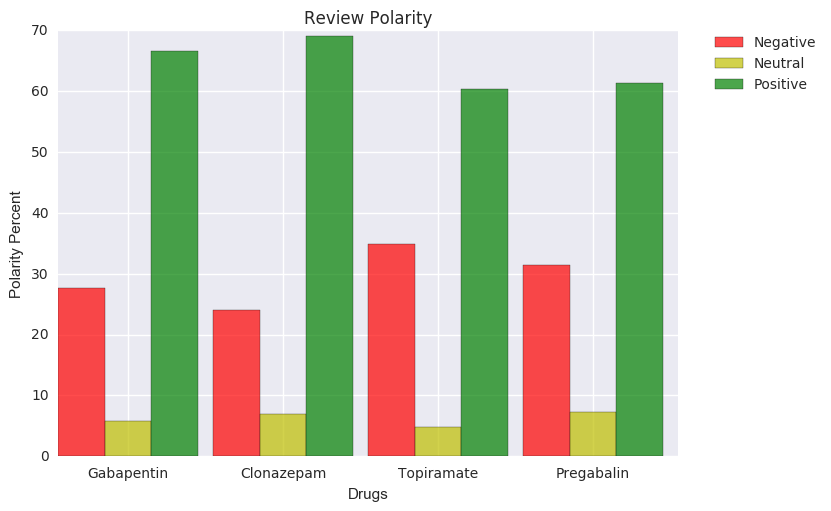

In [215]:
#Sentiment Analysis

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
n_groups = 4

Neg = polarity.Negative
Neu = polarity.Neutral
Pos = polarity.Positive

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.3

opacity = 0.7
error_config = {'ecolor': '0.8'}

rects1 = plt.bar(index, Neg, bar_width,
                 alpha=opacity,
                 color='r',
                 error_kw=error_config,
                 label='Negative')

rects2 = plt.bar(index + bar_width, Neu, bar_width,
                 alpha=opacity,
                 color='y',
                 error_kw=error_config,
                 label='Neutral')

rects3 = plt.bar(index + 2 * bar_width, Pos, bar_width,
                 alpha=opacity,
                 color='g',
                 error_kw=error_config,
                 label='Positive')

plt.xlabel('Drugs')
plt.ylabel('Polarity Percent')
plt.title('Review Polarity')
plt.xticks(index + 1.5*bar_width, ('Gabapentin', 'Clonazepam', 'Topiramate','Pregabalin'))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

#plt.tight_layout()
plt.figure(figsize=(4,10))
plt.show()

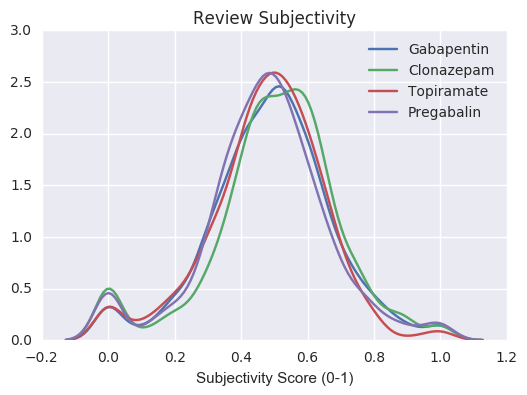

In [160]:
#Review Subjectivity
PdGabapentin = pd.Series(result1)
PdClonazepam = pd.Series(result3)
PdTopiramate = pd.Series(result5)
PdPregabalin = pd.Series(result7)

import seaborn as sns
sns.kdeplot(PdGabapentin,label= 'Gabapentin')
sns.kdeplot(PdClonazepam,label= 'Clonazepam')
sns.kdeplot(PdTopiramate,label= 'Topiramate')
sns.kdeplot(PdPregabalin,label= 'Pregabalin')
plt.title('Review Subjectivity')
plt.xlabel('Subjectivity Score (0-1)')
plt.show()

In [154]:
#Compute polarity for Gabapentin with rating
import sys  
import numpy as np
reload(sys)  
sys.setdefaultencoding('utf8')
from textblob import TextBlob
wikiA = map(lambda x: TextBlob(x),DataWithRating.Review)

 
resultA=[]
for i in range(len(wikiA)):
    k = wikiA[i].sentiment.polarity 
    resultA.append(k)

DataWithRating['Polarity'] = resultA 

#Compute polarity for Clonazepam with rating
wikiB = map(lambda x: TextBlob(x),DataWithRating1.Review)


resultB=[]
for i in range(len(wikiB)):
    k = wikiB[i].sentiment.polarity 
    resultB.append(k)

DataWithRating1['Polarity'] = resultB

#Compute polarity for Topiramate with rating
wikiC = map(lambda x: TextBlob(x),DataWithRating2.Review)

resultC=[]
for i in range(len(wikiC)):
    k = wikiC[i].sentiment.polarity 
    resultC.append(k)

DataWithRating2['Polarity'] = resultC

#Compute polarity for Topiramate with rating
wikiD = map(lambda x: TextBlob(x),DataWithRating3.Review)

resultD=[]
for i in range(len(wikiD)):
    k = wikiD[i].sentiment.polarity 
    resultD.append(k)

DataWithRating3['Polarity'] = resultD

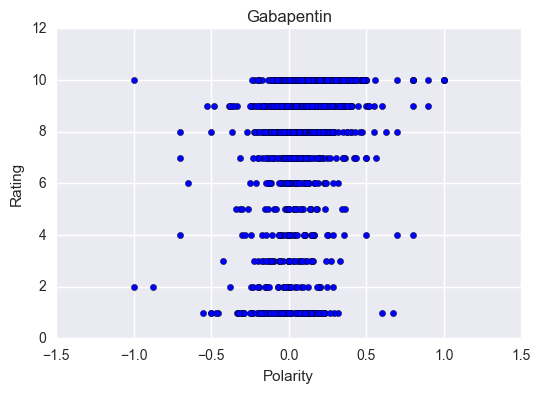

In [155]:
import seaborn as sns


plt.scatter(DataWithRating['Polarity'], DataWithRating['Rating'],c='b')
plt.title('Gabapentin')          
plt.xlabel('Polarity')
plt.ylabel('Rating')

           




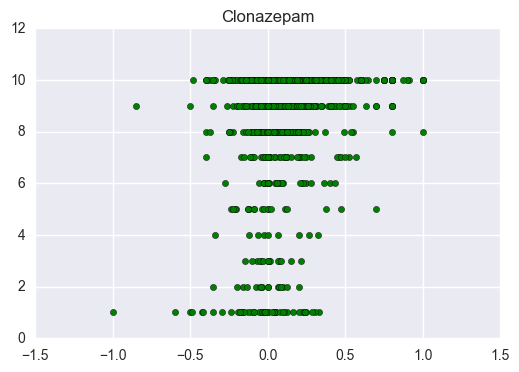

In [156]:
plt.scatter(DataWithRating1['Polarity'], DataWithRating1['Rating'],c='g')
plt.title('Clonazepam')

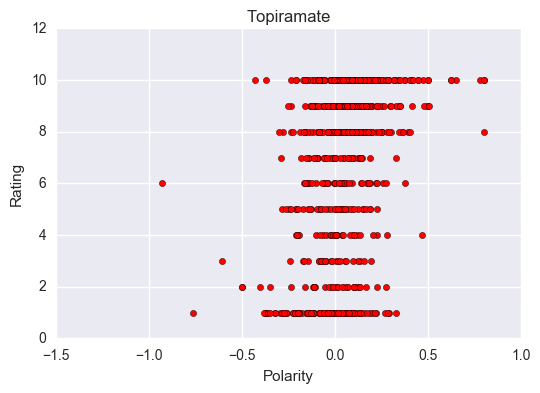

In [157]:
import seaborn as sns


plt.scatter(DataWithRating2['Polarity'], DataWithRating2['Rating'],c='r')
plt.title('Topiramate')          
plt.xlabel('Polarity')
plt.ylabel('Rating')

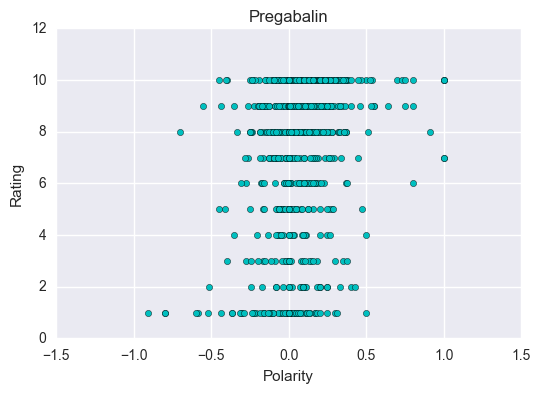

In [124]:
import seaborn as sns


plt.scatter(DataWithRating3['Polarity'], DataWithRating3['Rating'],c='c')
plt.title('Pregabalin')          
plt.xlabel('Polarity')
plt.ylabel('Rating')

In [54]:
Drugs.to_csv('Drugs.csv', index=False,encoding="utf-8")

In [55]:
import pandas as pd
Drugs = pd.read_csv('Drugs.csv')

In [50]:
DrugNameLabel = []

for i in range(Drugs.shape[0]):
    if Drugs['Name'][i]== 'Gabapentin':
        val = 0
    elif Drugs['Name'][i]== 'Clonazepam':
        val = 1
    elif Drugs['Name'][i]== 'Topiramate':
        val = 2
    else:
        val = 3
    
    DrugNameLabel.append(val)

In [45]:
Drugs = pd.concat([B,clonazepam,Topiramate,Pregabalin],ignore_index=True) 

In [58]:
Drugs['Polarity1']=(Drugs['Polarity']+ [1]*len(Drugs['Polarity']))/2.0

In [59]:
Drugs

,Condition,Rating,Review,Polarity,Name,label,Polarity1
0,Reflex Sympathetic Dystrophy Syndrome,10.0,"""I was diagnosed with RSD on Tuesday. The doct...",0.072994,Gabapentin,0,0.536497
1,Restless Legs Syndrome,10.0,"""Good for sleeping and my RLS I take 300 at ...",1.000000,Gabapentin,0,1.000000
2,Bipolar Disorder,10.0,"""I have been using this medication for quite s...",0.246429,Gabapentin,0,0.623214
3,Postherpetic Neuralgia,10.0,"""I'm on 300mg 3x a day. It's my lifesaver for ...",0.000000,Gabapentin,0,0.500000
4,Anxiety,10.0,"""I have had periodic depression for years, and...",0.070556,Gabapentin,0,0.535278
5,Pain,10.0,"""Okay, I want to start off by clarifying that ...",0.325000,Gabapentin,0,0.662500
6,Peripheral Neuropathy,10.0,"""I was diagnosed with neuro sarcosis. I was in...",0.240000,Gabapentin,0,0.620000
7,Trigeminal Neuralgia,10.0,"""I have had TN since 1997, and remember only n...",0.094389,Gabapentin,0,0.547195
8,Hot Flashes,10.0,"""20 years ago I was experiencing 33 hot flushe...",0.100000,Gabapentin,0,0.550000
9,Peripheral Neuropathy,10.0,"""Last year I went off gabapentin as I wanted t...",-0.112587,Gabapentin,0,0.443706


In [60]:
import re
Drugs['Review'] = Drugs['Review'].apply(lambda x: re.sub(r'\d+','',x))

In [199]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
tf_vectorizer = CountVectorizer(min_df=20,max_df=200, max_features=700,
                                stop_words='english')
ReviewMatrix = tf_vectorizer.fit_transform(Drugs['Review'])

In [200]:
df = pd.DataFrame(ReviewMatrix.toarray())
df 

,0,1,2,3,4,5,6,7,8,9,...,690,691,692,693,694,695,696,697,698,699
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [201]:
df['Polarity'] = Drugs['Polarity1']

In [202]:
df

,0,1,2,3,4,5,6,7,8,9,...,691,692,693,694,695,696,697,698,699,Polarity
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.536497
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1.000000
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.623214
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.500000
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.535278
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0.662500
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.620000
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.547195
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.550000
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.443706


In [203]:
import scipy
UpdatedReviewMatrix = scipy.sparse.csr_matrix(df.values)

In [204]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(UpdatedReviewMatrix, Drugs['label'], test_size=0.2, random_state=0)

In [205]:
from sklearn import naive_bayes
mnb = naive_bayes.MultinomialNB(alpha=1)
mnb.fit(X_train, y_train)

MultinomialNB(alpha=1, class_prior=None, fit_prior=True)

In [206]:
y_prob =  mnb.predict_proba(X_test)
y_pred = np.argmax(y_prob, axis=1)

In [198]:
np.mean(y_pred == y_test)

0.60237780713342137

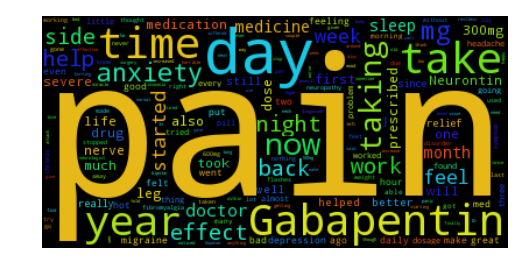

In [98]:
from os import path
import PIL
import matplotlib.pyplot as plt
from wordcloud import WordCloud
m = B.Review.str.cat(sep=', ')
wordcloud = WordCloud().generate(m)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");
plt.show()

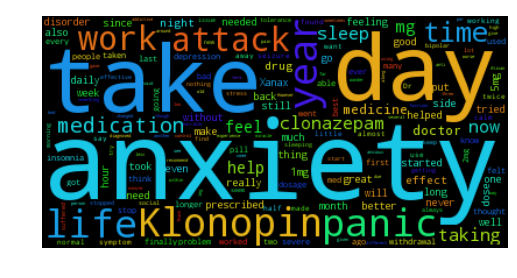

In [101]:
k = clonazepam.Review.str.cat(sep=', ')
wordcloud = WordCloud().generate(k)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");
plt.show()

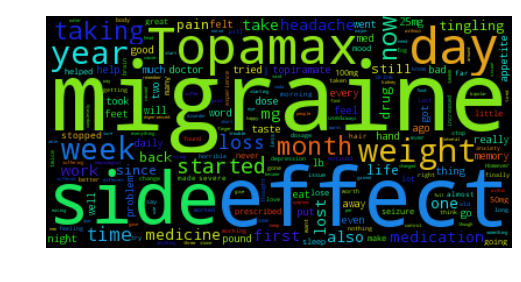

In [113]:
n = Topiramate.Review.str.cat(sep=', ')
wordcloud = WordCloud().generate(n)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");
plt.show()

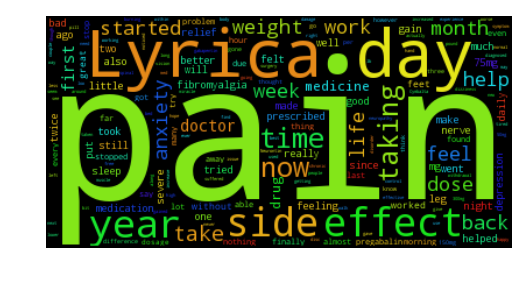

In [162]:
from os import path
import PIL
import matplotlib.pyplot as plt
from wordcloud import WordCloud
n = Pregabalin.Review.str.cat(sep=', ')
wordcloud = WordCloud().generate(n)
# Open a plot of the generated image.
plt.imshow(wordcloud)
plt.axis("off");
plt.show()